In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']), delimiter = ";")

In [ ]:
#Let us divide the dataset into some groups
df_fs = df.drop(columns = ['Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)','Target'])
df_emt = df.drop(columns = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)','Target'])

In [ ]:
from sklearn.utils import shuffle
target = df["Target"]
shuffled_target = shuffle(target, random_state = 2)

In [ ]:
#group1_data = pd.concat([df_fs, shuffled_target], axis = 1)
group2_data = pd.concat([df_emt, shuffled_target], axis = 1)

#MOVING ON TO THE NEXT DATASET
This considers the a particular phase which contains information of the student during the first semester

In [ ]:
group2_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
      dtype='object')

Selected Features: ['Course', 'Nacionality', "Father's qualification", "Father's occupation", 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']
Marital status: -0.007518822602673969
Application mode: -0.0014183410149237075
Application order: -0.003635601625006124
Course: 0.02087438420780139
Daytime/evening attendance	: 0.000795268766925672
Previous qualification: -0.0015784858514640732
Previous qualification (grade): -0.0005983369500574653
Nacionality: 0.0023810658542034123
Mother's qualification: -0.008869132895269171
Father's qualification: 0.0012259672367318508
Mother's occupation: -0.0007566480487300242
Father's occupation: 0.002007800597166642
Admission grade: -0.0018560601327372805
Displaced: -0.001968997282590723
Educational special needs: -0.0003162967225529889
Debtor: 0.00906351324209279
Tuition fees up to date: 0.07424723475161445
Gender: 0.01692236619976193
Scholarship holder: 0.01310712785

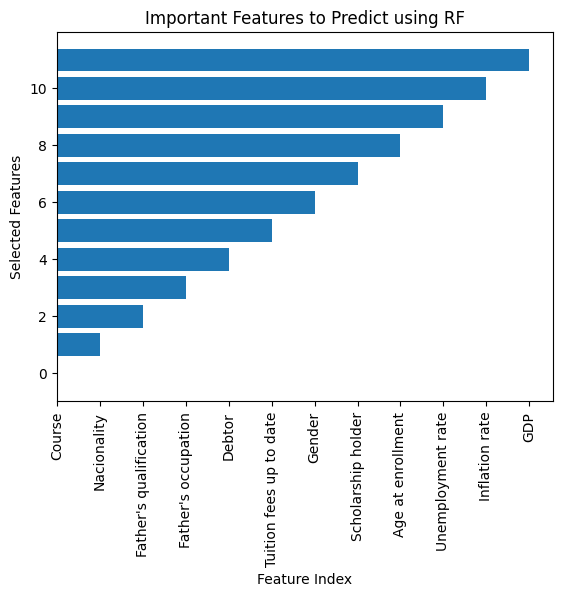

In [ ]:
#Feature importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score  #Since our dataset is highly imbalanced,
#we need to use an error metric that is quite robust to this effect

X = group2_data.drop("Target", axis = 1)
y = group2_data.Target
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a randomforest classifier
model = RandomForestClassifier()
#fitting
model.fit(X_train, y_train)
#using f1 score
def f1_scorer(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred,average = "weighted")
#calculating permutation features
result = permutation_importance(model, X_test, y_test, scoring = f1_scorer, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#setting threshold
threshold = np.percentile(importance_scores, 50)
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]
X_selected = X[selected_features]
print("Selected Features:", selected_features)
#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

#visualizing the feature importance
subset_data = group2_data[selected_features]
plt.barh(range(len(selected_features)), selected_features)
plt.xlabel("Feature Index")
plt.ylabel("Selected Features")
plt.title("Important Features to Predict using RF")
plt.xticks(range(len(selected_features)), selected_features, rotation = "vertical")
plt.show()

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.2 MB/s eta 0:00:00


Learning rate set to 0.084395
0:	learn: 1.0617201	total: 58ms	remaining: 57.9s
1:	learn: 1.0312129	total: 83.8ms	remaining: 41.8s
2:	learn: 1.0054184	total: 114ms	remaining: 37.8s
3:	learn: 0.9857626	total: 130ms	remaining: 32.4s
4:	learn: 0.9668300	total: 149ms	remaining: 29.7s
5:	learn: 0.9508928	total: 174ms	remaining: 28.8s
6:	learn: 0.9379840	total: 192ms	remaining: 27.3s
7:	learn: 0.9267517	total: 241ms	remaining: 29.9s
8:	learn: 0.9150956	total: 274ms	remaining: 30.2s
9:	learn: 0.9045543	total: 306ms	remaining: 30.3s
10:	learn: 0.8951264	total: 335ms	remaining: 30.1s
11:	learn: 0.8882683	total: 376ms	remaining: 30.9s
12:	learn: 0.8816727	total: 415ms	remaining: 31.5s
13:	learn: 0.8748527	total: 435ms	remaining: 30.7s
14:	learn: 0.8691647	total: 458ms	remaining: 30s
15:	learn: 0.8645741	total: 484ms	remaining: 29.7s
16:	learn: 0.8582935	total: 503ms	remaining: 29.1s
17:	learn: 0.8546959	total: 521ms	remaining: 28.4s
18:	learn: 0.8513044	total: 534ms	remaining: 27.6s
19:	learn: 0.

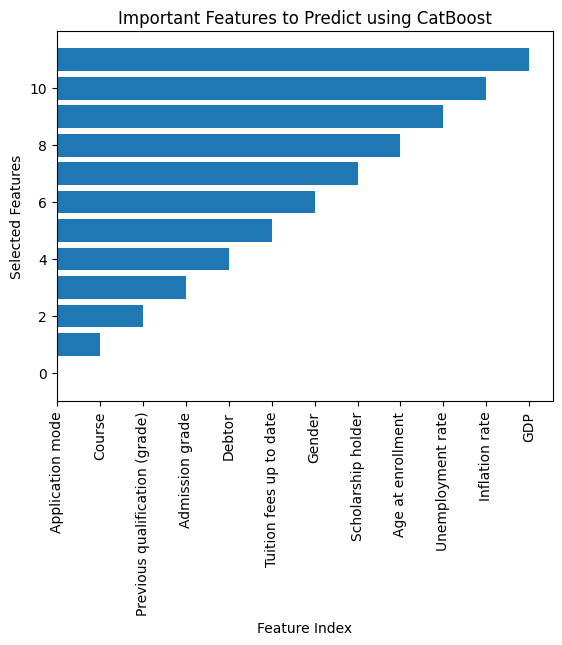

In [ ]:
#Using CATBOOST
from catboost import CatBoostClassifier, Pool
X = group2_data.drop("Target", axis = 1)
y = group2_data.Target
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a catboostclassifier
model = CatBoostClassifier()
#fitting
model.fit(X_train, y_train)
#using the F1 metrics
def f1_scorer(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred, average = "weighted")
#calculating permutation features
result = permutation_importance(model, X_test, y_test, scoring = f1_scorer, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#setting threshold
threshold = np.percentile(importance_scores, 50)
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]
X_selected = X[selected_features]
print("Selected Features:", selected_features)
#Feature names

#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

#visualizing the feature importance
subset_data = group2_data[selected_features]
plt.barh(range(len(selected_features)), selected_features)
plt.xlabel("Feature Index")
plt.ylabel("Selected Features")
plt.title("Important Features to Predict using CatBoost")
plt.xticks(range(len(selected_features)), selected_features, rotation = "vertical")
plt.show()

Selected Features: ['Application mode', 'Course', 'Previous qualification (grade)', "Father's occupation", 'Admission grade', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']
Marital status: 0.002148819215824704
Application mode: 0.014398860182479534
Application order: 0.002047225416323273
Course: 0.05552646562818499
Daytime/evening attendance	: 0.0013382664698995072
Previous qualification: 0.0021406105148330965
Previous qualification (grade): 0.013264236396386131
Nacionality: -0.0016587771896751867
Mother's qualification: 0.0023427120453542783
Father's qualification: -0.0028583241744380315
Mother's occupation: 0.003766967021611467
Father's occupation: 0.0056377260783652796
Admission grade: 0.007123084792697731
Displaced: -0.00029856729470945087
Educational special needs: 5.468670747500459e-05
Debtor: 0.019877285747583052
Tuition fees up to date: 0.07269427396267635
Gender: 0.0036031302927778787
Scholarship ho

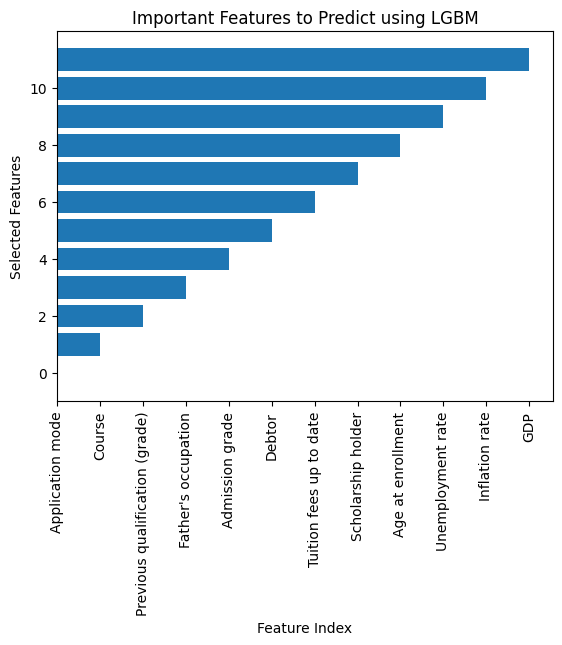

In [ ]:
#Using LightGradientBoostingMachine
import lightgbm as lgb
#from sklearn.model_selection import train_test_split
#from sklearn.inspection import permutation_importance
X = group2_data.drop("Target", axis = 1)
y = group2_data.Target
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a LGBMclassifier
model = lgb.LGBMClassifier()
#fitting
model.fit(X_train, y_train)
#using the F1 metrics
def f1_scorer(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred, average = "weighted")
#calculating permutation features
result = permutation_importance(model, X_test, y_test, scoring = f1_scorer, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#setting threshold
threshold = np.percentile(importance_scores, 50)
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]
X_selected = X[selected_features]
print("Selected Features:", selected_features)

#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

#visualizing the feature importance
subset_data = group2_data[selected_features]
plt.barh(range(len(selected_features)), selected_features)
plt.xlabel("Feature Index")
plt.ylabel("Selected Features")
plt.title("Important Features to Predict using LGBM")
plt.xticks(range(len(selected_features)), selected_features, rotation = "vertical")
plt.show()

In [ ]:
#for the purpose of using XGBoost, let us encoder the Target values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([0, 2, 0, ..., 0, 2, 2])

Selected Features: ['Application mode', 'Application order', 'Course', 'Previous qualification (grade)', "Mother's qualification", 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']
Marital status: 9.367797216145446e-05
Application mode: 0.011158395480787831
Application order: 0.006620446578383854
Course: 0.05412442266438679
Daytime/evening attendance	: 0.003557485889579837
Previous qualification: 0.0036727324777609096
Previous qualification (grade): 0.008418060838522135
Nacionality: -0.001246957153542183
Mother's qualification: 0.006317178957207936
Father's qualification: -3.9087430021378376e-05
Mother's occupation: 0.006180563151332008
Father's occupation: 0.0019111183490776117
Admission grade: 0.005111837219542348
Displaced: -0.006979626070920353
Educational special needs: 0.0002652570677106669
Debtor: 0.014165542733370695
Tuition fees up to date: 0.06751566935191176
Gender: -0.0005585518561571523
Scholarship

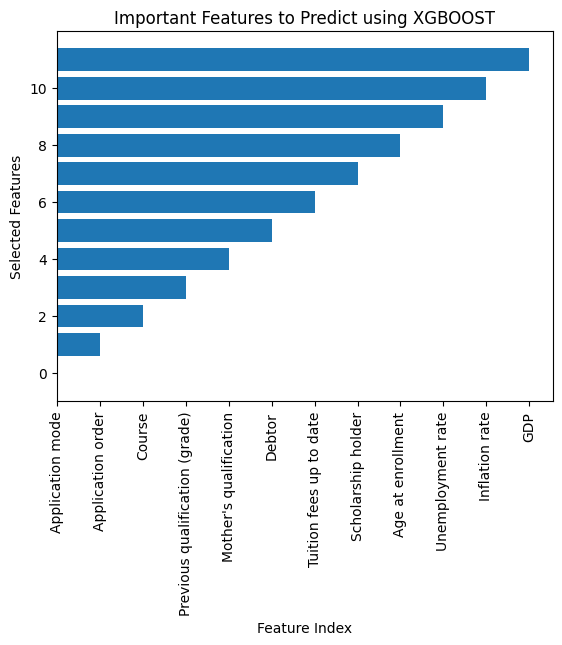

In [ ]:
#Using XGBOOST for the features importance
import xgboost as xgb
X = group2_data.drop("Target", axis = 1)
y = y_encoded
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a XGclassifier
model = xgb.XGBClassifier()
#fitting
model.fit(X_train, y_train)
#using the F1 metrics
def f1_scorer(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred, average = "weighted")
#calculating permutation features
result = permutation_importance(model, X_test, y_test, scoring = f1_scorer, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#setting threshold
threshold = np.percentile(importance_scores, 50)
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]
X_selected = X[selected_features]
print("Selected Features:", selected_features)

#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

#visualizing the feature importance
subset_data = group2_data[selected_features]
plt.barh(range(len(selected_features)), selected_features)
plt.xlabel("Feature Index")
plt.ylabel("Selected Features")
plt.title("Important Features to Predict using XGBOOST")
plt.xticks(range(len(selected_features)), selected_features, rotation = "vertical")
plt.show()

Modelling

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [115]:
#selected_features = group2_data[['GDP', 'Inflation rate', 'Unemployment rate', 'Age at enrollment', 'Scholarship holder', 'Gender', 'Tuition fees up to date','Debtor','Previous qualification (grade)', 'Admission grade']]
#selected_features = group2_data[['Age at enrollment', 'Tuition fees up to date', 'Admission grade', 'Previous qualification (grade)', 'Displaced', 'Debtor', 'Educational special needs', 'Course', 'GDP', 'Gender']
#selected_features = group2_data[['Application mode', 'Application order', 'Course', 'Previous qualification (grade)', "Mother's qualification", 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']]
selected_features = group2_data[['Course', 'Nacionality', "Father's qualification", "Father's occupation", 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']]

In [116]:
selected_features.head()

,Course,Nacionality,Father's qualification,Father's occupation,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP
0,171,1,12,9,0,1,1,0,20,10.8,1.4,1.74
1,9254,1,3,3,0,0,1,0,19,13.9,-0.3,0.79
2,9070,1,37,9,0,0,1,0,19,10.8,1.4,1.74
3,9773,1,37,3,0,1,0,0,20,9.4,-0.8,-3.12
4,8014,1,38,9,0,1,0,0,45,13.9,-0.3,0.79


In [118]:
X = selected_features
Y = y_encoded

#standard the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [120]:
X_scaled

array([[-4.20952017, -0.12629816, -0.66977812, ..., -0.28763846,
         0.12438647,  0.76576084],
       [ 0.19258032, -0.12629816, -1.25642703, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [ 0.10340423, -0.12629816,  0.95980216, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [ 0.31180489, -0.12629816,  0.95980216, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [ 0.14072248, -0.12629816,  0.95980216, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [ 0.44411507,  2.91113495,  0.95980216, ...,  0.42569541,
         1.7879738 , -0.74987207]])

In [121]:
check = pd.DataFrame(X_scaled)

In [122]:
check[5] = check[5].astype(int)
check[8] = check[8].astype(int)

In [123]:
check.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-4.209520,-0.126298,-0.669778,-0.080456,-0.358167,0,1.357640,-0.574914,0,-0.287638,0.124386,0.765761
1,0.192580,-0.126298,-1.256427,-0.317984,-0.358167,-2,1.357640,-0.574914,0,0.876222,-1.105222,0.347199
2,0.103404,-0.126298,0.959802,-0.080456,-0.358167,-2,1.357640,-0.574914,0,-0.287638,0.124386,0.765761
3,0.444115,-0.126298,0.959802,-0.317984,-0.358167,0,-0.736572,-0.574914,0,-0.813253,-1.466871,-1.375511
4,-0.408389,-0.126298,1.024985,-0.080456,-0.358167,0,-0.736572,-0.574914,2,0.876222,-1.105222,0.347199


In [124]:
array_data = check.values

In [125]:
X_scaled = array_data

In [126]:
#creating a stratifiedshufflesplit instance
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in sss.split(X_scaled, y):
  X_train, X_test = X_scaled[train_index], X_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [127]:
#Applying smote to oversample minority class
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Creating a random forest classifier object : SMOTE + RF
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [128]:
import time
start_time = time.time()
#Fitting the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
#calculating the fitting time
fitting_time = end_time - start_time
print("Fitting Time: {:.2f} seconds".format(fitting_time))

Fitting Time: 0.75 seconds


In [129]:
#Now that the model is trained, let us evaluate it on the training set
y_train_pred = rf_model.predict(X_train_resampled)
#
print("\nClassification Report:_______________SMOTE + RF")
print(classification_report(y_train_resampled, y_train_pred))


Classification Report:_______________SMOTE + RF
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1767
           1       0.98      0.97      0.98      1767
           2       0.96      0.97      0.97      1767

    accuracy                           0.97      5301
   macro avg       0.97      0.97      0.97      5301
weighted avg       0.97      0.97      0.97      5301



In [130]:
#let us train another model SVMSMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn.svm import SVC
#Applying SVMSMOTE to oversample the minority class in the training set
svmsmote = SVMSMOTE(random_state = 42)
X_train_resampled, y_train_resampled = svmsmote.fit_resample(X_train, y_train)

#Create a SVM classifier
svm_model = SVC(random_state = 42)

#Fitting the model on the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [92]:
y_train_pred = svm_model.predict(X_train_resampled)
#Printing the classification report
print("\nClassification Report:_______________SVMSMOTE")
print(classification_report(y_train_resampled, y_train_pred))


Classification Report:_______________SVMSMOTE
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      1767
           1       0.71      0.59      0.64      1767
           2       0.60      0.74      0.66      1767

    accuracy                           0.66      5301
   macro avg       0.67      0.66      0.66      5301
weighted avg       0.67      0.66      0.66      5301



In [131]:
#SVMSMOTE + RF
#Applying SVMSMOTE to oversample the minority class in the training set
svmsmote = SVMSMOTE(random_state = 42)
X_train_resampled, y_train_resampled = svmsmote.fit_resample(X_train, y_train)
#
rf_classifier_model = RandomForestClassifier(random_state = 42)
rf_classifier_model.fit(X_train_resampled, y_train_resampled)
####
y_train_pred = rf_classifier_model.predict(X_train_resampled)
#
print("\nClassification Report:____________________SVMSMOTE + RF")
print(classification_report(y_train_resampled, y_train_pred))


Classification Report:____________________SVMSMOTE + RF
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1767
           1       0.98      0.97      0.98      1767
           2       0.96      0.98      0.97      1767

    accuracy                           0.97      5301
   macro avg       0.97      0.97      0.97      5301
weighted avg       0.97      0.97      0.97      5301



In [132]:
#training a balanced random forest classifier to handle our imbalance class at an algorithm level
brf_model = RandomForestClassifier(class_weight = "balanced", random_state = 42)
brf_model.fit(X_train, y_train)
####
y_train_pred = brf_model.predict(X_train)
#
print("\nClassification Report:____________________ Balanced Random Forest Classifier")
print(classification_report(y_train, y_train_pred))


Classification Report:____________________ Balanced Random Forest Classifier
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1137
           1       0.90      0.97      0.93       635
           2       0.98      0.96      0.97      1767

    accuracy                           0.96      3539
   macro avg       0.95      0.96      0.96      3539
weighted avg       0.96      0.96      0.96      3539



In [133]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
### using Adaboost as base estimator
ADB = AdaBoostClassifier(random_state = 42)
###Training the easy ensemble classifier
ensemble_classifier_model = EasyEnsembleClassifier(base_estimator = ADB, random_state = 42)
ensemble_classifier_model.fit(X_train, y_train)

##making predictions on train set
y_train_pred = ensemble_classifier_model.predict(X_train)
#
print("\nClassification Report:____________________ Easy Ensemble Classifier")
print(classification_report(y_train, y_train_pred))

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_easy_ensemble.py:277: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(



Classification Report:____________________ Easy Ensemble Classifier
              precision    recall  f1-score   support

           0       0.66      0.50      0.57      1137
           1       0.30      0.52      0.39       635
           2       0.73      0.65      0.68      1767

    accuracy                           0.58      3539
   macro avg       0.56      0.56      0.55      3539
weighted avg       0.63      0.58      0.59      3539



#Validating the models

In [134]:
#Cross Validation for SMOTE+RF

from sklearn.model_selection import StratifiedKFold, cross_val_score

#Creating a stratified k-fold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Performing cross-validation on the resampled data with class stratification
scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1_macro')

#Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.71707836 0.71176699 0.72471444 0.74244814 0.68024706 0.71891534
 0.72560625 0.7285024  0.75118105 0.75675678]
Average cross-validation score: 0.7257216817672448


In [97]:

#SVMSMOTE CV
#Performing cross-validation on the resampled data with class stratification
scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1_macro')

# Print the cross-validation scores
print("Cross-validation scores for SVMSMOTE:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores for SVMSMOTE: [0.6161631  0.62828726 0.6549951  0.65646595 0.60303421 0.62524451
 0.64235317 0.59047824 0.57863524 0.67681708]
Average cross-validation score: 0.6272473859615922


In [135]:
#SVMSMOTE + RF CV
#Performing cross-validation on the resampled data with class stratification
scores = cross_val_score(rf_classifier_model, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1_macro')

# Print the cross-validation scores
print("Cross-validation scores for SVMSMOTE + RF:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores for SVMSMOTE + RF: [0.71707836 0.71176699 0.72471444 0.74244814 0.68024706 0.71891534
 0.72560625 0.7285024  0.75118105 0.75675678]
Average cross-validation score: 0.7257216817672448


Validation done on the algorithm level models for imbalanced datasets

In [136]:

#Balanced Random Forest Classifier
#Performing cross-validation
scores = cross_val_score(brf_model, X_train, y_train, cv=stratified_kfold, scoring='f1_macro')

#Print the cross-validation scores
print("Cross-validation scores for BRF:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores for BRF: [0.52741935 0.54542248 0.48844526 0.52705835 0.52304326 0.56127531
 0.51419753 0.52140546 0.5140969  0.52285889]
Average cross-validation score: 0.5245222792534568


In [137]:
#EasyEnsembleClassifier
#Performing cross-validation
import warnings
warnings.filterwarnings("ignore")
scores = cross_val_score(ensemble_classifier_model, X_train, y_train, cv=stratified_kfold, scoring='f1_macro')
#Print the cross-validation scores
print("Cross-validation scores for EEC:", scores)
print("Average cross-validation score:", scores.mean())
warnings.filterwarnings("default")

Cross-validation scores for EEC: [0.53217781 0.54780294 0.55046488 0.54063019 0.52059275 0.56357525
 0.53162612 0.52532882 0.53537407 0.49549697]
Average cross-validation score: 0.5343069814218457


Saving the trained model

In [138]:
from joblib import dump
#saving SMOTE + RF model
dump(rf_model, "rf_model.joblib")

['rf_model.joblib']

In [139]:
#saving SVMSMOTE model
dump(svm_model, "svm_model.joblib")

['svm_model.joblib']

In [141]:
#saving SVMSMOTE + RF model
dump(rf_classifier_model, "rf_classifier_model.joblib")

['rf_classifier_model.joblib']

In [142]:
#saving BRF model
dump(brf_model, "brf_model.joblib")

['brf_model.joblib']

In [144]:
#saving EEC model
dump(ensemble_classifier_model, "ensemble_classifier_model.joblib")

['ensemble_classifier_model.joblib']

#Predictions and Evaluation on Test Set

In [145]:
from joblib import load
rf_model = load("rf_model.joblib")

In [146]:
svm_model = load("svm_model.joblib")

In [147]:
rf_classifier_model = load("rf_classifier_model.joblib") #SVMSMOTE + RF

In [148]:
brf_model = load("brf_model.joblib")

In [149]:
ensemble_classifier_model = load("ensemble_classifier_model.joblib")

In [150]:
#making predictions on test set
y_pred_rf = rf_model.predict(X_test)
y_pred_svmsmote = svm_model.predict(X_test)
y_pred_svmsmote_rf = rf_classifier_model.predict(X_test)
y_pred_brf = brf_model.predict(X_test)
y_pred_eec = ensemble_classifier_model.predict(X_test)

In [151]:
#Evaluating the model performance
#Create a dictionary to map encoded labels to original words
label_mapping = {0: 'Dropout', 1:'Enrolled', 2: 'Graduate'}
print(label_mapping)
print("\nClassification Report:________SMOTE + RF")
print(classification_report(y_test, y_pred_rf))
print("\nClassification Report:_________SVMSMOTE")
print(classification_report(y_test, y_pred_svmsmote))
print("\nClassification Report:_______SVMSMOTE + RF")
print(classification_report(y_test, y_pred_svmsmote_rf))
print("\nClassification Report:_________Balanced Random Forest")
print(classification_report(y_test, y_pred_brf))
print("\nClassification Report:_________Easy Ensemble Classifier")
print(classification_report(y_test, y_pred_eec))

{0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

Classification Report:________SMOTE + RF
              precision    recall  f1-score   support

           0       0.60      0.55      0.57       284
           1       0.34      0.35      0.34       159
           2       0.68      0.72      0.70       442

    accuracy                           0.60       885
   macro avg       0.54      0.54      0.54       885
weighted avg       0.60      0.60      0.60       885


Classification Report:_________SVMSMOTE
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       284
           1       0.24      0.23      0.23       159
           2       0.66      0.65      0.65       442

    accuracy                           0.56       885
   macro avg       0.49      0.49      0.49       885
weighted avg       0.55      0.56      0.56       885


Classification Report:_______SVMSMOTE + RF
              precision    recall  f1-score   support

           

#Evaluating the Test Predictions

In [152]:

from sklearn.metrics import confusion_matrix

#the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print(cm)

[[156  42  86]
 [ 43  55  61]
 [ 61  64 317]]


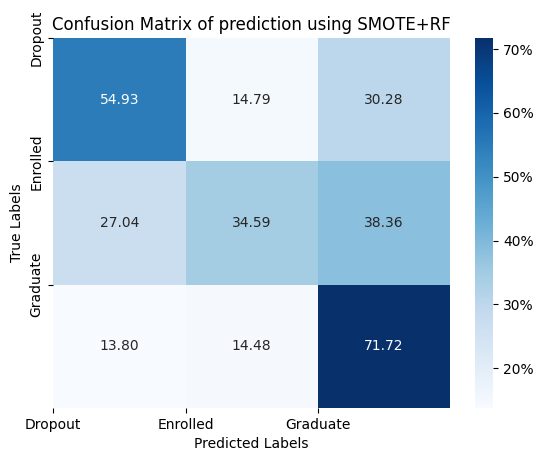

In [153]:


#Visualizing the confusion matrix from smote+RF model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using SMOTE+RF')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

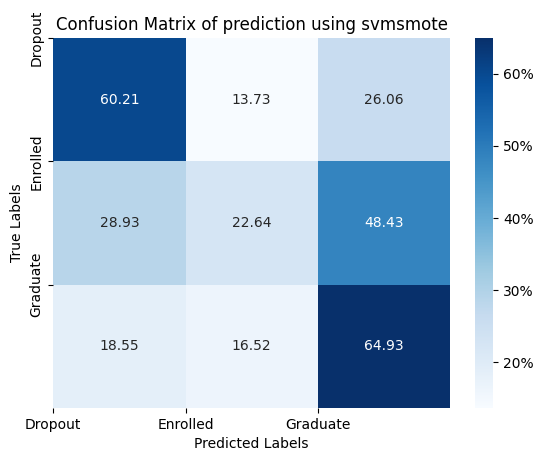

In [154]:


#Visualizing the confusion matrix from svmsmote model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_svmsmote)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using svmsmote')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

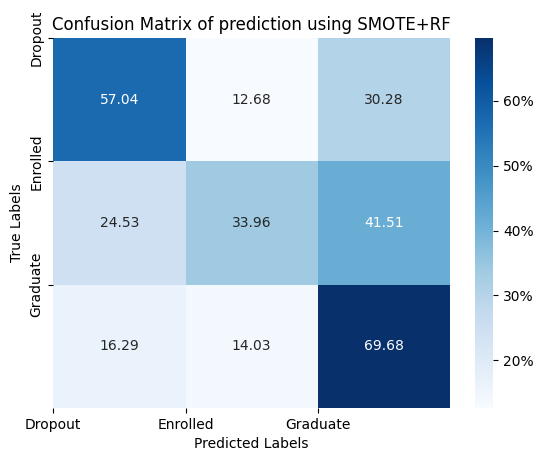

In [155]:


#Visualizing the confusion matrix from svmsmote + RF model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_svmsmote_rf)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using SMOTE+RF')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

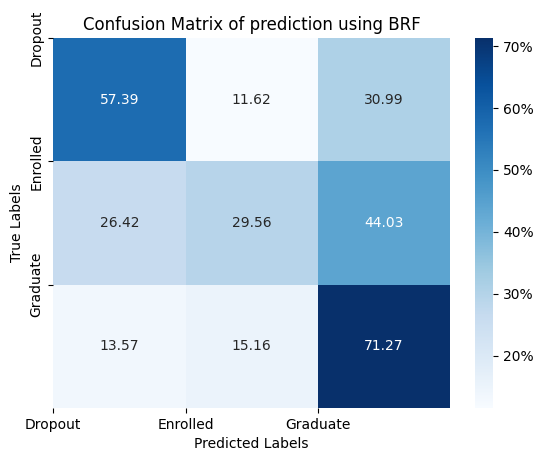

In [156]:


#Visualizing the confusion matrix from BRF model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_brf)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using BRF')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

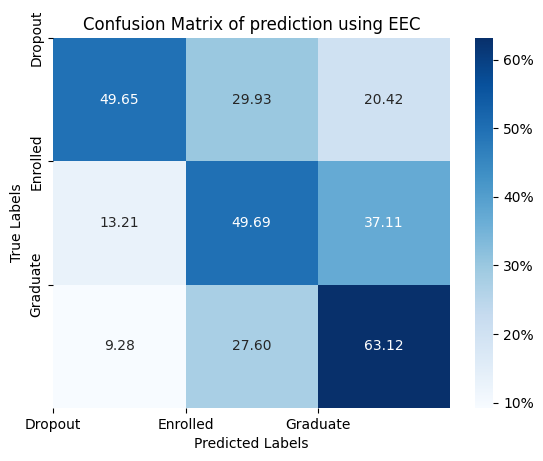

In [157]:


#Visualizing the confusion matrix from EEC model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_eec)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using EEC')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

In [158]:
compilations = {"Models": ["SMOTE + RF", "SVMSMOTE", "SVMSMOTE+RF", "BRF", "EEC"],
                "Train_F1_score": [0.97, 0.66, 0.97, 0.96, 0.59],
                "Test_set_F1_score": [0.60, 0.56, 0.59, 0.59, 0.58],
                "Test Accuracy": [0.60, 0.56, 0.59, 0.59, 0.56]}
frame = pd.DataFrame(compilations)
print("F1_scores evaluations for phase 2 - at the enrollment stage")
frame.head()

F1_scores evaluations for phase 2 - at the enrollment stage


,Models,Train_F1_score,Test_set_F1_score,Test Accuracy
0,SMOTE + RF,0.97,0.60,0.60
1,SVMSMOTE,0.66,0.56,0.56
2,SVMSMOTE+RF,0.97,0.59,0.59
3,BRF,0.96,0.59,0.59
4,EEC,0.59,0.58,0.56


In [159]:
compilations= {"Model": ["SMOTE + RF", "SVMSMOTE", "SVMSMOTE + RF", "BRF", "EEC"],
              "Graduate(2)": [0.70, 0.65, 0.68, 0.69, 0.67],
              "Enrolled(1)": [0.34, 0.23, 0.35, 0.31, 0.36],
              "Dropout(0)": [0.57, 0.59, 0.58, 0.59, 0.58]
              }
frame = pd.DataFrame(compilations)
print("F1 Scores evaluations for each class labels")
frame.head()

F1 Scores evaluations for each class labels


,Model,Graduate(2),Enrolled(1),Dropout(0)
0,SMOTE + RF,0.70,0.34,0.57
1,SVMSMOTE,0.65,0.23,0.59
2,SVMSMOTE + RF,0.68,0.35,0.58
3,BRF,0.69,0.31,0.59
4,EEC,0.67,0.36,0.58
